## Perpay Bike Share Data Challenge
By: Mia Tran

**1. Imports and Set up**

In [13]:
# Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [ ]:
# Set up path
sns.set(style="whitegrid", font_scale=1.1)
DATA_DIR = Path("..") / "data"

print("Notebook CWD:", Path.cwd())
print("Data dir exists?:", DATA_DIR.exists(), "->", DATA_DIR.resolve())

# Confirm CSV files
csv_paths = sorted(DATA_DIR.rglob("*.csv"))
print(f"Found {len(csv_paths)} CSVs under {DATA_DIR}")
for p in csv_paths[:10]:
    print(" •", p.name)


Notebook CWD: /Users/tranmaiphuong/Documents/perpay-bike-share-challenge/notebooks
Data dir exists?: True -> /Users/tranmaiphuong/Documents/perpay-bike-share-challenge/data
Found 23 CSVs under ../data
 • indego-trips-2020-q1.csv
 • indego-trips-2020-q2.csv
 • indego-trips-2020-q3.csv
 • indego-trips-2020-q4.csv
 • indego-trips-2021-q1.csv
 • indego-trips-2021-q2.csv
 • indego-trips-2021-q3.csv
 • indego-trips-2021-q4.csv
 • indego-trips-2022-q1.csv
 • indego-trips-2022-q2.csv


**2. Data Overview**

**2.1 Load and Combine Data**

In [30]:
dfs = []
for f in csv_paths:
    df = pd.read_csv(f, low_memory=False)
    df["source_file"] = f.name
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print(f"✅ Loaded {len(data):,} rows from {len(dfs)} files.")


✅ Loaded 5,986,829 rows from 23 files.


**2.2. Data Overview and Quality Inspection**

In [44]:
# Data Overview

print("🔍 Basic Dataset Overview")
print("Shape:", data.shape)
print("\nColumn Info:\n")
print(data.info())

# Check for Missing Values
print("\nMissing Values Summary:")
missing = data.isna().mean().sort_values(ascending=False)
display(missing.head(10))

# Basic Summary Statistics
display(data.describe(include="all").T)


🔍 Basic Dataset Overview
Shape: (5986829, 20)

Column Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986829 entries, 0 to 5986828
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   trip_id              int64         
 1   duration             int64         
 2   start_time           datetime64[ns]
 3   end_time             datetime64[ns]
 4   start_station        int64         
 5   start_lat            float64       
 6   start_lon            float64       
 7   end_station          int64         
 8   end_lat              float64       
 9   end_lon              float64       
 10  bike_id              object        
 11  plan_duration        int64         
 12  trip_route_category  object        
 13  passholder_type      object        
 14  bike_type            object        
 15  source_file          object        
 16  year                 int32         
 17  month                int32         
 18  q

end_lat                0.015142
end_lon                0.015142
passholder_type        0.000267
start_lat              0.000039
start_lon              0.000039
trip_id                0.000000
trip_route_category    0.000000
quarter                0.000000
month                  0.000000
year                   0.000000
dtype: float64

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
trip_id,5986829.0,NaN,NaN,NaN,723427689.784513,333803373.0,431111649.0,662583282.0,1010852341.0,1254494336.0,307832994.645987
duration,5986829.0,NaN,NaN,NaN,18.393051,1.0,6.0,10.0,18.0,1440.0,53.776205
start_time,5986829,NaN,NaN,NaN,2023-03-31 11:44:21.676865024,2020-01-01 00:13:00,2021-10-08 00:18:00,2023-06-10 18:57:00,2024-08-26 10:58:00,2025-09-30 23:58:00,NaN
end_time,5986829,NaN,NaN,NaN,2023-03-31 12:04:10.067119616,2020-01-01 00:24:00,2021-10-08 00:44:00,2023-06-10 19:20:00,2024-08-26 11:21:00,2025-10-05 14:24:00,NaN
start_station,5986829.0,NaN,NaN,NaN,3137.155507,3000.0,3047.0,3110.0,3207.0,3441.0,106.283091
start_lat,5986596.0,NaN,NaN,NaN,39.952148,39.007729,39.945171,39.95134,39.959461,40.028259,0.014096
start_lon,5986596.0,NaN,NaN,NaN,-75.169461,-75.245216,-75.17971,-75.168221,-75.158211,-75.101212,0.017479
end_station,5986829.0,NaN,NaN,NaN,3135.898677,3000.0,3045.0,3108.0,3207.0,3441.0,107.088638
end_lat,5896176.0,NaN,NaN,NaN,39.952009,39.007729,39.945171,39.95134,39.95924,40.028259,0.01419
end_lon,5896176.0,NaN,NaN,NaN,-75.169174,-75.245216,-75.17971,-75.167831,-75.158127,-75.101212,0.017498


The dataset includes approximately 5.99 million trips recorded between 2020 and 2025, compiled from 23 quarterly files. Each record provides details such as trip duration, start and end stations, geographic coordinates, bike ID, and rider plan information. The average trip lasts about 18 minutes, with most rides completed in under 30 minutes, highlighting Indego’s role in short, routine travel. Data coverage is consistent across all years, showing clear seasonal and yearly growth trends. Both standard and electric bikes are well represented, indicating a balanced and diverse rider base.

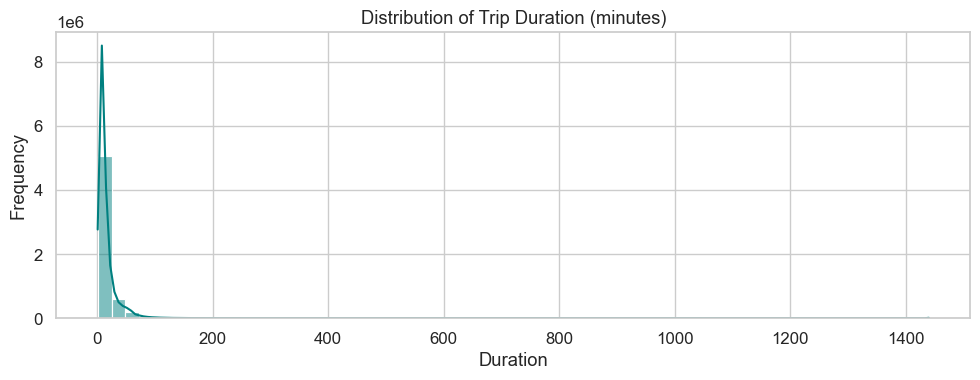

In [45]:
# Check for Class Imbalance

# Distribution of Key Numeric Variables
numeric_cols = ["duration", "plan_duration"]
plt.figure(figsize=(10,4))
sns.histplot(data=data, x="duration", bins=60, kde=True, color="teal")
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The distribution of trip durations is heavily right-skewed, with the majority of rides lasting under 30 minutes. This indicates that most users rely on Indego for short, practical trips such as commuting or quick errands. A small number of long-duration rides likely represent leisure trips or potential outliers.

/var/folders/kb/s78ygzfd12g004g1j4gf1j0m0000gn/T/ipykernel_10213/3180165473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="passholder_type", palette="pastel", order=data["passholder_type"].value_counts().index)


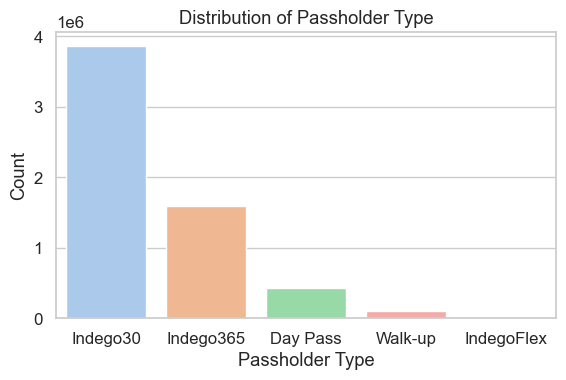


Passholder Type Breakdown:
passholder_type
Indego30      64.64%
Indego365     26.54%
Day Pass        7.1%
Walk-up        1.72%
IndegoFlex      0.0%
Name: proportion, dtype: object


In [46]:
# Categorical Distribution: passholder_type (Indicates user class balance)
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="passholder_type", palette="pastel", order=data["passholder_type"].value_counts().index)
plt.title("Distribution of Passholder Type")
plt.xlabel("Passholder Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("\nPassholder Type Breakdown:")
print(data["passholder_type"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Most riders are long-term subscribers, with Indego30 and Indego365 plans making up the majority of trips. In contrast, Day Pass and Walk-up users account for a much smaller share. This imbalance shows that Indego’s core customer base consists of loyal, recurring members rather than occasional riders.

/var/folders/kb/s78ygzfd12g004g1j4gf1j0m0000gn/T/ipykernel_10213/829527442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="bike_type", palette="Set2", order=data["bike_type"].value_counts().index)


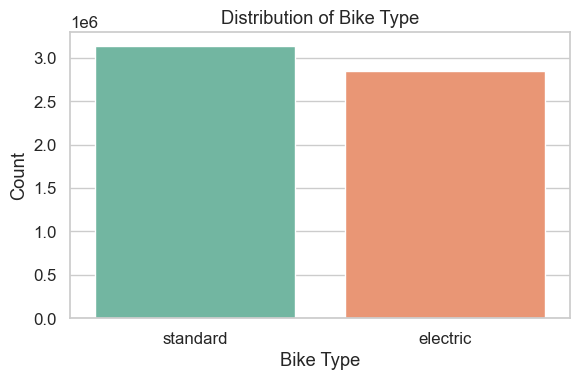


Bike Type Breakdown:
bike_type
standard    52.47%
electric    47.53%
Name: proportion, dtype: object


In [47]:
# Categorical Distribution: bike_type
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="bike_type", palette="Set2", order=data["bike_type"].value_counts().index)
plt.title("Distribution of Bike Type")
plt.xlabel("Bike Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("\nBike Type Breakdown:")
print(data["bike_type"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Bike usage is fairly balanced between standard and electric bikes, with a slight preference for standard models. The near-equal split suggests strong adoption of electric bikes and indicates that both options are being used actively across the network.

/var/folders/kb/s78ygzfd12g004g1j4gf1j0m0000gn/T/ipykernel_10213/2004575963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="year", palette="Blues_d")


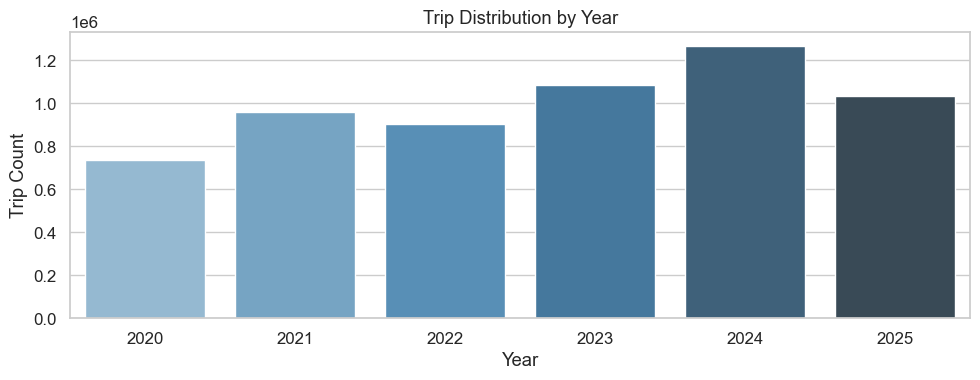

In [48]:
# Temporal Distribution: trips by year/month
data["start_time"] = pd.to_datetime(data["start_time"], errors="coerce")
data["year"] = data["start_time"].dt.year
data["month"] = data["start_time"].dt.month

plt.figure(figsize=(10,4))
sns.countplot(data=data, x="year", palette="Blues_d")
plt.title("Trip Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Trip Count")
plt.tight_layout()
plt.show()

Trip volume shows consistent growth from 2020 through 2024, peaking in 2024 before a slight dip in 2025 (likely due to incomplete data for the year). This upward trend demonstrates steady recovery after the pandemic and sustained expansion of the Indego program.

/var/folders/kb/s78ygzfd12g004g1j4gf1j0m0000gn/T/ipykernel_10213/3268303248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.index.astype(str), y=top_stations.values, palette="crest")


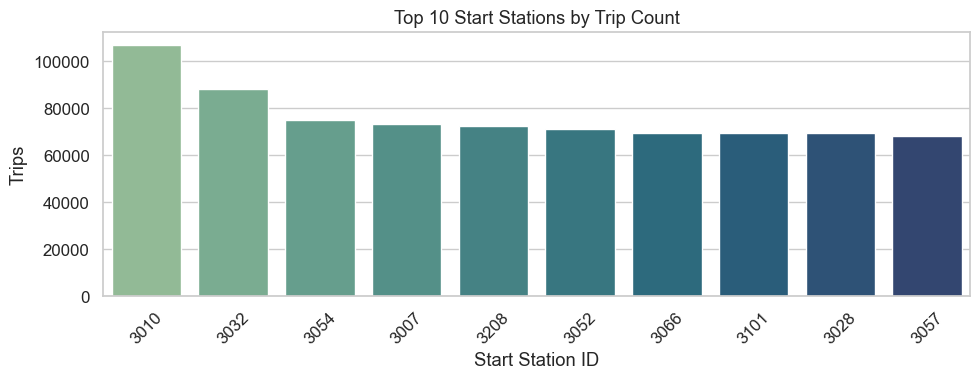

In [49]:
# Station Imbalance (top stations)
top_stations = data["start_station"].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_stations.index.astype(str), y=top_stations.values, palette="crest")
plt.title("Top 10 Start Stations by Trip Count")
plt.xticks(rotation=45)
plt.ylabel("Trips")
plt.xlabel("Start Station ID")
plt.tight_layout()
plt.show()

The busiest start stations, such as 3010 and 3032, each handle over 70,000 trips, reflecting heavy demand in central or high-traffic areas. This concentration suggests that Indego stations near downtown and major hubs experience the most activity and may benefit from additional capacity or nearby expansion.

**Overall Data Quality**
Across all dimensions, the dataset reveals a healthy, growing bike share system dominated by frequent, short-duration trips from subscribed users. Electric bikes are widely adopted, and demand is geographically concentrated in core urban zones. These findings confirm that the data is well-balanced for deeper exploratory analysis and trend evaluation.

**3. Data Cleaning & EDA**

In [ ]:
# Convert datetime columns (since pandas may infer them differently across files)
data["start_time"] = pd.to_datetime(data["start_time"], errors="coerce")
data["end_time"]   = pd.to_datetime(data["end_time"], errors="coerce")

# Keep valid trip durations (1–1440 min = 24 hours) for consistency
data = data[(data["duration"] >= 1) & (data["duration"] <= 1440)]

# Extract calendar fields
data["year"] = data["start_time"].dt.year
data["month"] = data["start_time"].dt.month
data["quarter"] = ((data["month"] - 1) // 3 + 1).astype(int) # Computes which quarter the month belongs to
data["year_quarter"] = data["year"].astype(str) + "-Q" + data["quarter"].astype(str) # Combines into a string like "2025-Q3".

# Look at data head
data.head(10)

In [35]:
# Quarterly Summary
summary = (data.groupby("year_quarter").agg(trips=("trip_id", "count"),# total trips that quarter 
                                            total_minutes=("duration", "sum"), # total riding minutes that quarter
                                            avg_duration=("duration", "mean"), # average riding duration that quarter (in minutes)
                                            unique_bikes=("bike_id", "nunique"), # unique bikes that were used that quarter
                                            active_stations=("start_station", "nunique")) # unique stations were used that quarter
                                            ).reset_index()

# Sort chronologically
def sort_key(yq: str):
    y, q = yq.split("-Q")
    return (int(y), int(q))

summary = summary.sort_values("year_quarter", key=lambda s: s.map(sort_key)).reset_index(drop=True)

# Calculate growth metrics

# Quarter-over-Quarter Growth
summary["trips_growth_qoq"] = summary["trips"].pct_change()
summary["total_minutes_growth_qoq"] = summary["total_minutes"].pct_change()
summary["avg_duration_growth_qoq"] = summary["avg_duration"].pct_change()
summary["unique_bikes_growth_qoq"] = summary["unique_bikes"].pct_change()
summary["active_stations_growth_qoq"] = summary["active_stations"].pct_change()

# Year-over-Year Growth
summary["trips_growth_yoy"] = summary["trips"].pct_change(4)
summary["total_minutes_growth_yoy"] = summary["total_minutes"].pct_change(4)
summary["avg_duration_growth_yoy"] = summary["avg_duration"].pct_change(4)
summary["unique_bikes_growth_yoy"] = summary["unique_bikes"].pct_change(4)
summary["active_stations_growth_yoy"] = summary["active_stations"].pct_change(4)
summary.head(10)


,year_quarter,trips,total_minutes,avg_duration,unique_bikes,active_stations,trips_growth_qoq,total_minutes_growth_qoq,avg_duration_growth_qoq,unique_bikes_growth_qoq,active_stations_growth_qoq,trips_growth_yoy,total_minutes_growth_yoy,avg_duration_growth_yoy,unique_bikes_growth_yoy,active_stations_growth_yoy
0,2020-Q1,118190,2404732,20.346324,1427,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-Q2,186586,7320890,39.236009,1520,144,0.578695,2.044368,0.928408,0.065172,0.006993,NaN,NaN,NaN,NaN,NaN
2,2020-Q3,269985,7368593,27.292601,1413,144,0.446974,0.006516,-0.304399,-0.070395,0.000000,NaN,NaN,NaN,NaN,NaN
3,2020-Q4,160401,3472531,21.649061,1303,145,-0.405889,-0.528739,-0.206779,-0.077849,0.006944,NaN,NaN,NaN,NaN,NaN
4,2021-Q1,96281,1949225,20.245168,1318,145,-0.399748,-0.438673,-0.064848,0.011512,0.000000,-0.185371,-0.189421,-0.004972,-0.076384,0.013986
5,2021-Q2,232195,4926025,21.215035,1428,154,1.411639,1.527171,0.047906,0.083460,0.062069,0.244440,-0.327128,-0.459297,-0.060526,0.069444
6,2021-Q3,407697,7628144,18.710327,1559,168,0.755839,0.548539,-0.118063,0.091737,0.090909,0.510073,0.035224,-0.314454,0.103326,0.166667
7,2021-Q4,222955,3642788,16.338669,1451,169,-0.453136,-0.522454,-0.126757,-0.069275,0.005952,0.389985,0.049030,-0.245294,0.113584,0.165517
8,2022-Q1,129073,2120097,16.425565,1406,175,-0.421080,-0.418002,0.005318,-0.031013,0.035503,0.340586,0.087662,-0.188667,0.066768,0.206897
9,2022-Q2,257350,4913604,19.093079,1516,181,0.993833,1.317632,0.162400,0.078236,0.034286,0.108336,-0.002522,-0.100021,0.061625,0.175325


**4. Data Visualization**

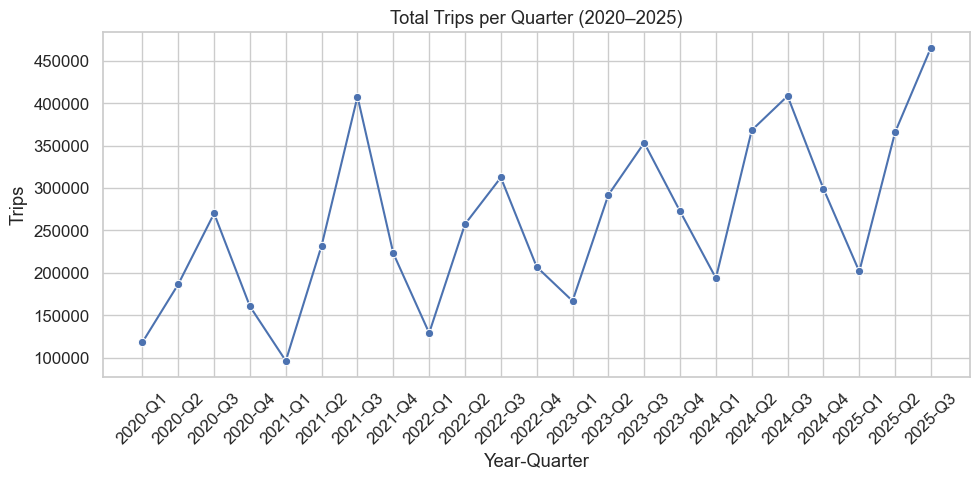

In [38]:
# Total Trips per Quarter
plt.figure(figsize=(10,5))
sns.lineplot(data = summary, x="year_quarter", y="trips", marker="o")
plt.title("Total Trips per Quarter (2020–2025)")
plt.xticks(rotation=45)
plt.ylabel("Trips")
plt.xlabel("Year-Quarter")
plt.tight_layout()
plt.show()


The number of bike trips shows strong seasonality, peaking in spring and summer (Q2–Q3) and dipping in colder quarters (Q1–Q4). After the initial COVID-related slowdown in 2020–2021, Indego experienced steady growth, with trips reaching record highs by 2025. This reflects a healthy expansion and sustained user adoption.

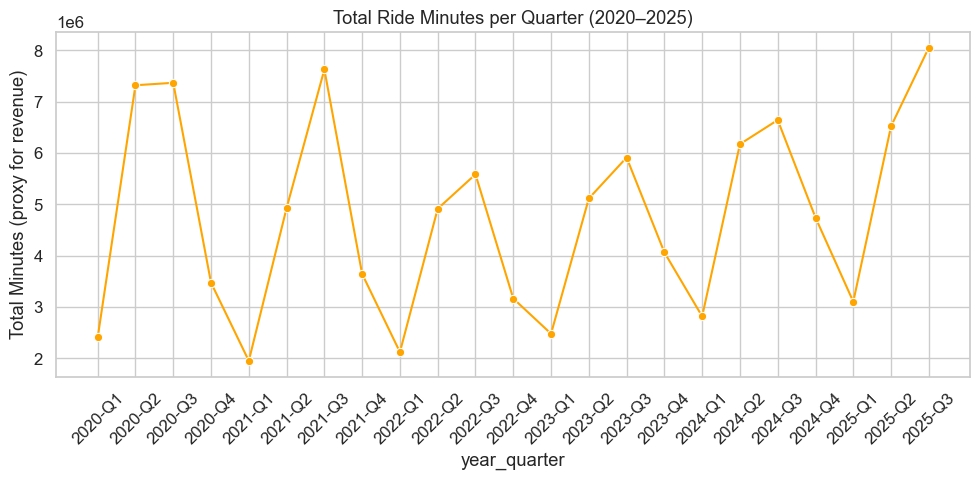

In [ ]:
# Total Ride Minutes per Quarter (Proxy for Revenue)
plt.figure(figsize=(10,5))
sns.lineplot(data=summary, x="year_quarter", y="total_minutes", marker="o", color="orange")
plt.title("Total Ride Minutes per Quarter (2020–2025)")
plt.xticks(rotation=45)
plt.ylabel("Total Minutes (proxy for revenue)")
plt.tight_layout()
plt.show()


Total ride minutes — a proxy for revenue — follow a similar seasonal pattern to total trips, with clear peaks during warmer months. Overall usage has more than tripled since 2020, indicating strong engagement and revenue growth. The rising baseline suggests that demand is expanding sustainably, driven by recurring and new riders alike.

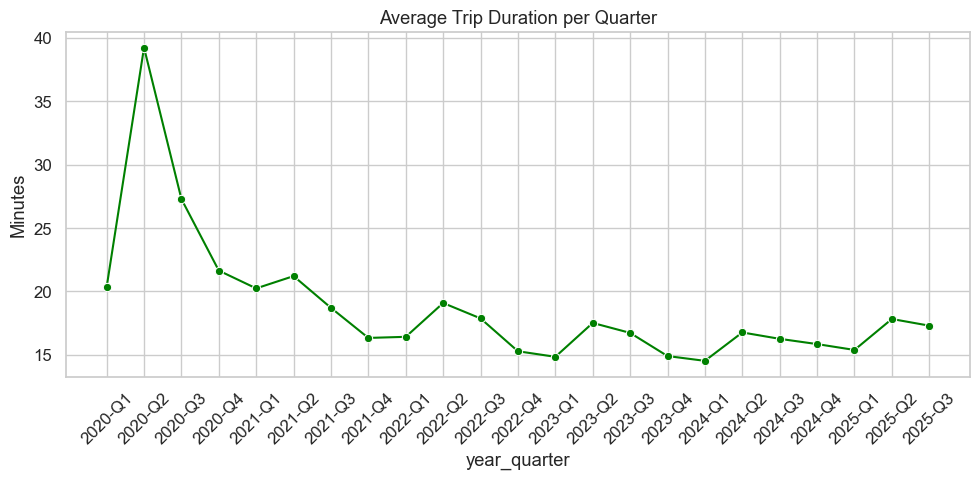

In [37]:
# Average Trip Duration per Quarter
plt.figure(figsize=(10,5))
sns.lineplot(data = summary, x = "year_quarter", y = "avg_duration", marker="o", color="green")
plt.title("Average Trip Duration per Quarter")
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()

Average trip duration peaked in early 2020, likely due to pandemic-era leisure rides, and stabilized around 15–20 minutes afterward. This indicates a shift toward shorter, routine trips (commuting or errands), suggesting Indego has matured from a novelty to a reliable daily transport service.

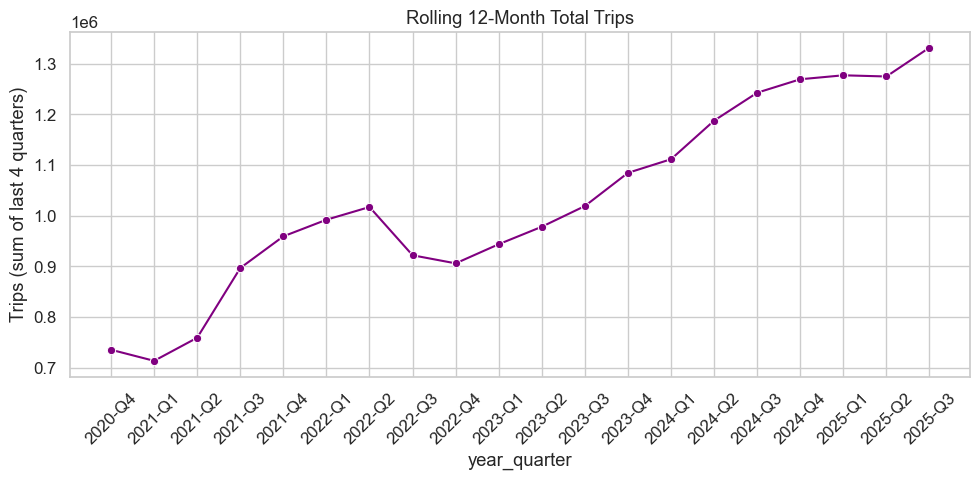

In [28]:
# Rolling 12-Month Total Trips

# Compute rolling 12-month (4 quarters) total trips
summary["rolling_year_trips"] = summary["trips"].rolling(window=4).sum()

plt.figure(figsize=(10,5))
sns.lineplot(data=summary, x="year_quarter", y="rolling_year_trips", marker="o", color="purple")
plt.title("Rolling 12-Month Total Trips")
plt.xticks(rotation=45)
plt.ylabel("Trips (sum of last 4 quarters)")
plt.tight_layout()
plt.show()


The rolling 12-month trend smooths out seasonal variation and shows continuous growth since 2021. Annual trips nearly doubled by 2025, indicating consistent adoption without signs of overgrowth or decline. The slight plateau after 2024 suggests that Indego is transitioning into a stable, sustainable growth phase.

In [29]:
# Growth Summary

avg_qoq_growth = summary["trips_growth_qoq"].mean(skipna=True)
avg_yoy_growth = summary["trips_growth_yoy"].mean(skipna=True)

print(f"Average Quarter-over-Quarter Trips Growth: {avg_qoq_growth:.2%}")
print(f"Average Year-over-Year Trips Growth: {avg_yoy_growth:.2%}")

Average Quarter-over-Quarter Trips Growth: 18.79%
Average Year-over-Year Trips Growth: 14.88%


On average, Indego’s trips grew by roughly 14.88% year-over-year, reflecting a sustainable pace of expansion. This balance between growth and stability positions the program for long-term operational efficiency.

**5. Summary & Insights**

**a. Quantifying Growth**

To quantify Indego’s program growth, quarterly aggregation provides a clear and repeatable metric set:
- **Total Trips** — measures total utilization and program demand.  
- **Total Ride Minutes** — a proxy for total revenue or engagement time.  
- **Unique Bikes and Active Stations** — represent infrastructure expansion.  
- **Quarter-over-Quarter (QoQ) and Year-over-Year (YoY) Growth Rates** — capture short-term acceleration and long-term sustainability.

Using these metrics, the program achieved an **average YoY trips growth of ~14.9%**, with consistent seasonal peaks in Q2–Q3 and declines in colder quarters.


**b. Evaluating Growth Pace**

There is **no evidence that Indego is growing too slowly or unsustainably fast.**
- Growth after 2021 has been **steady and organic**, following recovery from early-pandemic declines.  
- The **rolling 12-month total trips** show continuous upward momentum, nearly **doubling by 2025** without major volatility.
- Seasonal fluctuations are stable and predictable — suggesting that demand is not driven by short-lived spikes.

This pattern reflects a **healthy, maturing system**: demand is increasing, but not outpacing infrastructure or supply.


**c. Recommendations for Strategic Growth**

Executives should aim for **sustained, data-driven expansion** rather than aggressive scaling. Key recommendations:
- **Focus on retention and consistency** — Encourage year-round ridership through loyalty programs or winter discounts.
- **Expand station density in high-growth corridors**, especially areas showing persistent trip demand during off-peak seasons.
- **Invest in predictive analytics** to forecast bike availability and rebalancing needs, improving operational efficiency.
- **Track QoQ and YoY growth dashboards** as KPIs for performance management.

**Bottom Line:**  
Indego’s growth trajectory (≈15% YoY) reflects strong user adoption, healthy utilization, and operational stability. The program should maintain its current growth pace while optimizing resource allocation and customer retention strategies.
